<center><H1> IBM Coursera Applied Data Science Capstone </H1></center>

## Assignment: Segmenting and Clustering Neighborhoods in Toronto

## Part 1: Scraping and processing
*Use the BeautifulSoup package or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe*

### Output goal: A clean and tidy dataframe of Canadian M postal codes scraped from the Wikipedia webpage

In [1]:
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### 1.1: Scrape

In [2]:
webpage = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

print('Webpage loaded with requests.')

Webpage loaded with requests.


In [3]:
# Parse page with BeautifulSoup

bspage = BeautifulSoup(webpage,'html.parser')

print('BeautifulSoup object created.')

BeautifulSoup object created.


In [4]:
# Create empty list objects for dealing with the website table data of interest

PostalCodeLs = []
BoroughLs = []
NeighborhoodLs = []

# Locate the table in scraped Wikipedia webpage and extract each feature column to the list objects

for row in bspage.find('table').find_all('tr'):
    cells = row.find_all('td')
    if (len(cells)>0):
        PostalCodeLs.append(cells[0].text)
        BoroughLs.append(cells[1].text)
        NeighborhoodLs.append(cells[2].text)

print('Table contents extracted to lists.')

Table contents extracted to lists.


In [13]:
# Optional: Inspect scraped list to check for correct input and confirm assumptions about observation separation

# postLStemp = pd.DataFrame(PostalCodeLs)
# postLStemp

### 1.2 Transform

In [5]:
# Remove new line characters from observations in lists

PostalCodeLs = list(map(lambda x:x.rstrip("\n"), PostalCodeLs))
BoroughLs = list(map(lambda x:x.rstrip("\n"), BoroughLs))
NeighborhoodLs = list(map(lambda x:x.rstrip("\n"), NeighborhoodLs))

print('Characters stripped from observations.')

Characters stripped from observations.


In [6]:
# Create a Pandas dataframe from the cleaned lists. Pass appropriate feature names for each list.

Toronto = pd.DataFrame({"PostalCode":PostalCodeLs, "Borough":BoroughLs,"Neighborhood":NeighborhoodLs})

# Inspect the new dataframe.

Toronto
# Toronto.shape

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Instruction: *Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.*

In [7]:
# Remove observations where Borough is "Not assigned"

TorontoTrans1 = Toronto[Toronto.Borough!="Not assigned"].reset_index(drop=True)

# Confirm removal of postal codes that are unassigned to any Borough – Row 0 of the dataframe should now be M3A.

TorontoTrans1

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Instruction: *If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.*

In [10]:
NoNeighborhood = TorontoTrans1['Neighborhood'] == "Not assigned"
TorontoTrans1[NoNeighborhood]

,PostalCode,Borough,Neighborhood


In [11]:
# There does not seem to be any rows where this is the case – maybe the Wikipedia page has been updated.
# If this transformation were required:
# TorontoTrans1["Neighborhood"]=TorontoTrans1["Neighborhood"].replace("Not assigned",TorontoTrans1["Borough"])

# Confirm that no postal codes are repeated and inspect shape of the dataframe:

# TorontoTrans1['PostalCode'].nunique() # / Result: 103

TorontoTrans1.shape

(103, 3)

### [End of Part 1]

## Part 2: Geocoding
*Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.*

*Use the Geocoder package or the csv file provided at http://cocl.us/Geospatial_data.*

### Output goal: A dataframe of Canadian M postal codes with geocoded coordinates per PostalCode

In [41]:
# The geocoder package was installed and tested but could not get a response even with loop
# So will use the provided CSV file

In [13]:
geodata = pd.read_csv("http://cocl.us/Geospatial_data")
geodata.shape

(103, 3)

In [14]:
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [15]:
# Edit postal code feature name by defining columns of this dataframe so that the column name is consistent for merger

geodata.columns = ['PostalCode', 'Latitude', 'Longitude']

geodata.columns

Index(['PostalCode', 'Latitude', 'Longitude'], dtype='object')

In [17]:
# Merge the postal code and neighborhoods dataframe with the coordinates dataframe

Toronto_gcoded = pd.merge(TorontoTrans1, geodata, how='inner', on="PostalCode")
Toronto_gcoded

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


### [End of Part 2]

## Part 3: Segmentation, clustering and analysis
*Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.*

*Just make sure:*

*1. to add enough Markdown cells to explain what you decided to do and to report any observations you make.*

*2. to generate maps to visualize your neighborhoods and how they cluster together.*

### Output goal: A set of meaningful clusters for Toronto neighborhoods which might provide insight regarding which neighborhoods are similar to one another (derived using a k-means algorithm)

In [18]:
# Import required libraries for Part 3

import numpy as np

import geopy
from geopy.geocoders import Nominatim # For geocoding at city level – required for map generation

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors # For creation of plots

from sklearn.cluster import KMeans # For k-means cluster analysis

import folium # For map rendering

import json
from pandas.io.json import json_normalize

print('Libraries imported.')

Libraries imported.


### 3.1: Preparing the data and IDA
For this assignment, I will be looking at the postal code areas for boroughs with "Toronto" in their name only. 

Foursquare API queries, clustering and analysis will occur at the postal code level so the comparison will be at this location level, which is a geographic level also known as a Forward Sortation Area (FSA) (in the Canadian postal system). For some postal codes this FSA aligns to a single neighbourhood, while for others, the FSA aligns to multiple adjacent neighbourhoods. So, for example, the features of postal code M5E will reflect the types of places in Berczy Park, while the features of postal code M5A will reflect the types of places in the two neighborhoods of Regent Park AND Harbourfront as an aggregated group.

First I will take a look at all of the neighborhoods on a map to set the context before further analysis.

In [19]:
# Use geopy to get coordinates required for setting the focus of the Folium basemap

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="TN_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [21]:
# Create and store the Folium map of Toronto

tn_basemap = folium.Map(location=[latitude, longitude], zoom_start=11)

In [16]:
# Add the FSA markers to the map, which will be labeled with the strings of neighborhoods within the FSA

for lat, lng, label in zip(Toronto_gcoded['Latitude'], Toronto_gcoded['Longitude'], Toronto_gcoded['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tn_basemap)

tn_basemap

### 3.2: Exploring the neighborhoods with the Foursquare API

In [22]:
# Define Foursquare credentials and version

CLIENT_ID = 'KRND1MPPQRN3RU32M00CFTAH32XMHVJBX4F2VNRQEEA0PVQQ' # unique Foursquare Client ID
CLIENT_SECRET = 'G2FQJOONTKX2MRFYCDJU4APRFDTXTBJO5XF4M5SEI1F2NV5X' # unique Foursquare Client Secret
VERSION = '20200724' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

# Define parameters for API calls

LIMIT = 200 # Limit on number of venues returned

Your credentials:
CLIENT_ID: KRND1MPPQRN3RU32M00CFTAH32XMHVJBX4F2VNRQEEA0PVQQ
CLIENT_SECRET: G2FQJOONTKX2MRFYCDJU4APRFDTXTBJO5XF4M5SEI1F2NV5X


In [23]:
# Create function for making a nearby venue query for all of the Toronto FSAs

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
# Run the function using the relevant arguments for the Toronto data and store the results in a new dataframe

Toronto_venues = getNearbyVenues(names = Toronto_gcoded['Neighborhood'],
                                   latitudes = Toronto_gcoded['Latitude'],
                                   longitudes = Toronto_gcoded['Longitude']
                                  )

Toronto_venues.shape

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

(2141, 7)

In [30]:
# Explore the new dataframe of venues that was generated from the Foursquare API queries

# Total venues in each neighborhood
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale East",34,34,34,34,34,34
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,4,4,4,4,4,4


In [31]:
# Inspect the total number of unique venue types

print('There are {} unique categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 269 unique categories.


In [32]:
# Inspect the dataframe

Toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
2136,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Royal Canadian Legion #210,43.628855,-79.518903,Social Club
2137,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Islington Florist & Nursery,43.630156,-79.518718,Flower Shop
2138,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2139,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Once Upon A Child,43.631075,-79.518290,Kids Store


**One hot encoding**

Using one hot encoding, the observations obtained from Foursquare can be transformed into a new dummified dataframe. 

In the new dataframe, each row corresponds to a venue retrieved from the API, however, the venue category of each observation is now stored through a binary encoding across all 269 possible venue categories (which are now columnwise variables). A '1' is encoded in the cell for the category that the observation *is* and '0' is encoded for all of the remaining 268 categories it is not. The head of this new one hot dataframe is examined below.

At this stage I am retitling the 'Neighborhood' variable to 'FSA' in order to make the dataframe more compact – as explained earlier, this is actually the true geographic level for the areas we are going to be analysing.

In [39]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['FSA'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head(10)

,FSA,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Checking the dimensions of the dataframe
Toronto_onehot.shape

(2141, 270)

**Creating a proportional score for the presence of venue types**

The one hot dataframe can then be easily adapted into a new dataframe in which we can generate proportional scores for each FSA and each venue category. 

For example, the FSA that includes neighborhoods 'Regent Park, Harbourfront' has 46 venues, 1 of which is an Antique Shop. The score for Antique Shops in 'Regent Park, Harbourfront' can be calculated by taking the mean of the one hot values for Antique Shop presence:

(1 + 45x0)/46 = 0.021739130434783

The dataframe below, Toronto_grouped, does this for every venue category for every FSA.

In [41]:
Toronto_grouped = Toronto_onehot.groupby('FSA').mean().reset_index()
Toronto_grouped

,FSA,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0
92,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
93,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
94,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**Creating venue presence summaries**

Using these values, we can now inspect the top venue categories present in each FSA.

In [42]:
num_top_venues = 5

for hood in Toronto_grouped['FSA']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['FSA'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0               Skating Rink  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4         Mexican Restaurant  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1     Coffee Shop  0.14
2  Sandwich Place  0.14
3             Pub  0.14
4        Pharmacy  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2                      Diner  0.05
3              Shopping Mall  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0          Restaurant  0.09
1  Italian Restaurant  0.09

                  venue  freq
0    Falafel Restaurant   0.2
1        Massage Studio   0.2
2           Coffee Shop   0.2
3  Caribbean Restaurant   0.2
4                   Bar   0.2


----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East----
                 venue  freq
0        Deli / Bodega   0.5
1       Baseball Field   0.5
2    Mobile Phone Shop   0.0
3                Motel   0.0
4  Moroccan Restaurant   0.0


----Parkdale, Roncesvalles----
            venue  freq
0  Breakfast Spot  0.14
1       Gift Shop  0.14
2       Bookstore  0.07
3     Coffee Shop  0.07
4         Dog Run  0.07


----Parkview Hill, Woodbine Gardens----
                  venue  freq
0           Pizza Place  0.22
1  Gym / Fitness Center  0.11
2             Gastropub  0.11
3                  Bank  0.11
4    Athletics & Sports  0.11


----Parkwoods----
                        venue  freq
0           Food & Drink Shop  0.33
1         

We can expand this to include the top ten venue categories for each FSA and then create a new dataframe to store and present this information.

In [43]:
# Function for sorting venue category scores in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Set up ranking parameters
num_top_venues = 10

indicators = ['st', 'nd', 'rd'] # suffixes for ordinal values

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['FSA']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Coffee Shop,Pub,Sandwich Place,Diner,Deli / Bodega,Department Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Gift Shop,Fried Chicken Joint,Sandwich Place,Bridal Shop,Diner,Restaurant,Deli / Bodega,Middle Eastern Restaurant
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,"Bedford Park, Lawrence Manor East",Restaurant,Coffee Shop,Sandwich Place,Italian Restaurant,Liquor Store,Pizza Place,Indian Restaurant,Café,Pub,Sushi Restaurant


### 3.3: Cluster analysis

The goal of this analysis is to investigate similarity between geographic areas – in this case, the Toronto FSAs – through utilization of data from the Foursquare API and employing k-means clustering. 

After the clustering process we will be able to rejoin cluster group membership as a categorical data feature to the 'Toronto_gcoded' dataframe from section 3.1 and generate a new map where the FSA points on the Folium map are colored according to each FSA's cluster membership.

Before beginning the k-means clustering we need to create an alternative dataframe in which the categorical variable has been dropped as the algorithm will only accept a dataframe of continuous quantitative variables.

In [47]:
Toronto_grouped_clustering = Toronto_grouped.drop('FSA', 1)

**Determining the number of centers for the k-means clustering**

In this assignment, there is no explicit or implict sub-grouping for the geographic areas that gives us a known cluster count. Though 5 clusters were explored for Manhattan in an earlier Lab, this may not necessarily be the best number of centers for the analysis in this case.

There is a heuristic method for approaching this problem, which involves running instances of the k-means clustering algorithm for N range of centers and then generating a scree plot, which plots the Total Within Cluster Sum of Squares (WCSS) for each different center number k-means, against the number of centers. The 'elbow point' of the scree plot can be a good guide for selecting the number of clusters that will be in the model. The elbow is the point at which the WCSS changes to decrease at a much slower rate than previously, following the addition of another cluster center. The WCSS itself is a diagnostic for model quality and the scree plot allows for inspecting the best tradeoff between lowering the WCSS while not creating an excessive number of clusters. 

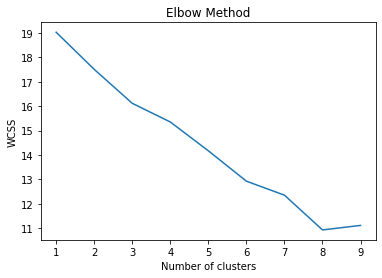

In [136]:
# Initialize total within sum of squares error: wss
wss = []

# Look over 1 to 10 possible clusters
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 82)
    kmeans.fit(Toronto_grouped_clustering)
    wss.append(kmeans.inertia_)


# Produce a scree plot
plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot will not always feature a single obvious elbow for informing this decision. While from inspection there are various changes in gradient, there is an elbow first formed at 3 clusters. Keeping in mind the goal of the analysis – investigating suburb similarity based on venue types present – 3 clusters will possibly be more useful for our exploration and categorization of Toronto FSAs. Using the scree plot as a guide to inform this decision, we proceed with 3 clusters for the k-means algorithm.

In [124]:
# Inspect where the elbow point occurs. From the plot produced it looks like 3 is a reasonable option.

# Select number of clusters
kclusters = 3

In [125]:
# Run k-means clustering
km_out = KMeans(n_clusters = kclusters, random_state=1).fit(Toronto_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
km_out.labels_[0:103]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 0], dtype=int32)

In [138]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster', km_out.labels_)
neighborhoods_venues_sorted.head()

,Cluster,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,2,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Coffee Shop,Pub,Sandwich Place,Diner,Deli / Bodega,Department Store,Dessert Shop
2,2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Gift Shop,Fried Chicken Joint,Sandwich Place,Bridal Shop,Diner,Restaurant,Deli / Bodega,Middle Eastern Restaurant
3,2,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,2,"Bedford Park, Lawrence Manor East",Restaurant,Coffee Shop,Sandwich Place,Italian Restaurant,Liquor Store,Pizza Place,Indian Restaurant,Café,Pub,Sushi Restaurant


In [139]:
Toronto_mrgd = Toronto_gcoded

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_mrgd = Toronto_mrgd.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Toronto_mrgd.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Construction & Landscaping,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.0,French Restaurant,Pizza Place,Coffee Shop,Portuguese Restaurant,Intersection,Hockey Arena,Diner,Dance Studio,Deli / Bodega,Department Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Theater,Café,Health Food Store,Historic Site,Hotel
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Miscellaneous Shop,Boutique,Event Space,Vietnamese Restaurant,German Restaurant,Curling Ice
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2.0,Coffee Shop,Diner,Yoga Studio,Hobby Shop,Distribution Center,Burrito Place,Smoothie Shop,Beer Bar,Italian Restaurant,Café


In [141]:
Toronto_mrgd.shape

(103, 16)

Before proceeding we need to make sure the data type is correct for the Cluster labels as Folium will not accept them if the labels are stored as a float. From inspection the join seems to have added a decimal so let's check:

In [142]:
Toronto_mrgd.dtypes

PostalCode                 object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster                   float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

There seems to be a behaviour where Pandas can sometimes recast the dtype to float. In a prior draft of this assignment this did not happen when joining the cluster labels so I am not sure about what conditions make this reproducible. As the dtypes output above shows, it has happened to the 'Cluster' variable this time around. Folium's color assignment for the points on the map will not work unless we fix up this data type issue. Returning the Cluster labels to their desired int type so that they can work for color-labelling in Folium is dealt with the following line of code (if necessary):

In [143]:
Toronto_mrgd["Cluster"] = Toronto_mrgd["Cluster"].fillna(0.0).astype(int)

### 3.4: Cluster mapping and neighborhood categorization

We're now ready to visualize the cluster membership on a Folium map.

In [144]:
# Create map
mapped_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_mrgd['Latitude'], Toronto_mrgd['Longitude'], Toronto_mrgd['Neighborhood'], Toronto_mrgd['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapped_clusters)
       
mapped_clusters

Immediately we can see that Cluster 2 has much higher FSA membership than Clusters 0 and 1. Cluster 0 reveals something interesting however – that there's an FSA grouping for similar neighborhood characteristics that obviously transcends any geographic clustering. There are pocketed Cluster 0 FSAs totally surrounded by Cluster 2 FSAs. 

If there's a unique area that someone likes, for example, in west Toronto, then Cluster 0 membership could provide an insight into an east Toronto area that is similar. Let's take a look at the clusters in detail and examine whether the additional context of ranked venue types allows for meaningful qualitative categorization of the three groups.

In [149]:
c0 = Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 0]
c1 = Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 1]
c2 = Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 2]
c0

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Park,Food & Drink Shop,Construction & Landscaping,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,0,Park,Women's Store,Pool,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,0,Convenience Store,Park,Metro Station,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
45,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,M9N,York,Weston,43.706876,-79.518188,0,Convenience Store,Park,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
66,M2P,North York,York Mills West,43.752758,-79.400049,0,Convenience Store,Park,Flower Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Yoga Studio
85,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,0,Park,Playground,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspecting this dataframe I noticed that there are NaN values for the venue rankings of three FSAs. Let's check how many FSAs have this issue for each cluster.

In [64]:
c0["1st Most Common Venue"].isna().sum()

3

In [65]:
c1["1st Most Common Venue"].isna().sum()

0

In [66]:
c2["1st Most Common Venue"].isna().sum()

0

It seems to have affected 3 FSAs in Cluster 0. An explanation could be that the Foursquare call did not return venues for these FSAs. If this was the case, then we know that it wasn't a downstream error caused by subsequent manipulations. To check for the results we'll first need to get the neighborhood names of interest.

In [72]:
c0_missing = c0.loc[c0.isnull().any(axis=1)]
c0_missing

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To check whether the API returned any results for these Neighborhoods, let's go back to the "Toronto_venues" dataframe that was directly generated from the Foursquare API call results.

In [74]:
etobicoke_missing = Toronto_venues.loc[Toronto_venues["Neighborhood"] == "Islington Avenue, Humber Valley Village"]
etobicoke_missing

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [75]:
northyork_missing = Toronto_venues.loc[Toronto_venues["Neighborhood"] == "York Mills, Silver Hills"]
northyork_missing

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [77]:
scarborough_missing = Toronto_venues.loc[Toronto_venues["Neighborhood"] == "Upper Rouge"]
scarborough_missing

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


It seems that no venues were returned from the query for the coordinates of these Toronto FSAs. 

**This should be flagged as a limitation of the report and a warning for judging cluster membership (and therefore similarity) between these three FSAs and any of the other FSAs in the cluster.**

**The Three Clusters**

**Cluster 0: Green spaces and small business**

Cluster 0 includes high frequencies of parks, playgrounds, trails and dog runs. Looking at the types of businesses in these FSAs – convenience stores, yoga studios and diners – there seems to be a smaller scale commercial feel. It's possible that these might be areas appropriate for someone interested in balancing the amenities of a fine grain local suburban neighborhood with the convenience of proximity to the CBD.

In [151]:
Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 0, Toronto_mrgd.columns[[2] + list(range(5, Toronto_mrgd.shape[1]))]]

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,0,Park,Food & Drink Shop,Construction & Landscaping,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
5,"Islington Avenue, Humber Valley Village",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Caledonia-Fairbanks,0,Park,Women's Store,Pool,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
35,"East Toronto, Broadview North (Old East York)",0,Convenience Store,Park,Metro Station,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
45,"York Mills, Silver Hills",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Weston,0,Convenience Store,Park,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
66,York Mills West,0,Convenience Store,Park,Flower Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Yoga Studio
85,"Milliken, Agincourt North, Steeles East, L'Amo...",0,Park,Playground,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
91,Rosedale,0,Park,Playground,Trail,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
95,Upper Rouge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Cluster 1: Active lifestyle**

This cluster is interesting because all three areas had the same 1st most common venue: gyms, however the FSAs are quite dispersed from one another. Dog runs, tennis courts and dance studios also figure into the most common venues – making these a great choice for anyone where fitness facilities are a priority in their neighborhood selection.

In [152]:
Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 1, Toronto_mrgd.columns[[2] + list(range(5, Toronto_mrgd.shape[1]))]]

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Humber Summit,1,Gym,Pizza Place,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
52,"Willowdale, Newtonbrook",1,Gym,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Event Space
83,"Moore Park, Summerhill East",1,Gym,Tennis Court,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dance Studio


**Cluster 2: Cafes and high-density retail**

This cluster reflects the city's metropolitan commercial districts – there's a very high number of coffee shops, as well as a wider variety of cuisines on offer at restaurants. There are bars and pro sports venues which are venue types we did not see come up in the top 10 most common venues for the other clusters' FSAs.

In [153]:
Toronto_mrgd.loc[Toronto_mrgd['Cluster'] == 2, Toronto_mrgd.columns[[2] + list(range(5, Toronto_mrgd.shape[1]))]]

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,2,French Restaurant,Pizza Place,Coffee Shop,Portuguese Restaurant,Intersection,Hockey Arena,Diner,Dance Studio,Deli / Bodega,Department Store
2,"Regent Park, Harbourfront",2,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Theater,Café,Health Food Store,Historic Site,Hotel
3,"Lawrence Manor, Lawrence Heights",2,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Miscellaneous Shop,Boutique,Event Space,Vietnamese Restaurant,German Restaurant,Curling Ice
4,"Queen's Park, Ontario Provincial Government",2,Coffee Shop,Diner,Yoga Studio,Hobby Shop,Distribution Center,Burrito Place,Smoothie Shop,Beer Bar,Italian Restaurant,Café
6,"Malvern, Rouge",2,Fast Food Restaurant,Yoga Studio,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
98,"The Kingsway, Montgomery Road, Old Mill North",2,River,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,College Cafeteria
99,Church and Wellesley,2,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Pizza Place,Bubble Tea Shop,Hotel,Pub
100,"Business reply mail Processing Centre, South C...",2,Light Rail Station,Garden Center,Burrito Place,Skate Park,Auto Workshop,Fast Food Restaurant,Farmers Market,Spa,Restaurant,Garden
101,"Old Mill South, King's Mill Park, Sunnylea, Hu...",2,Deli / Bodega,Baseball Field,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Falafel Restaurant


We can also look at how many times each venue type was the top occuring venue type in an FSA. It turns out that for 17 of the 90 FSAs in Cluster 2, Coffe Shop was the 1st most common venue. Cafe is a different factor level for venue type but is essentially the same sort of business – so there are actually 25 FSAs where this is the case.

In [155]:
c2["1st Most Common Venue"].value_counts().head(5)

Coffee Shop       17
Café               8
Grocery Store      7
Clothing Store     4
Pizza Place        4
Name: 1st Most Common Venue, dtype: int64

**Final comments**

While one cluster came out much larger than the other two, in terms of the k-means analysis result this may be accurate for describing the densely organised FSAs of Toronto's CBD and surrounds – we should possibly expect a high degree of similarity across these areas, especially because the FSA geographic feature itself clusters where the population is greater (since it is a mail processing geographic feature).

Further research that leveraged another category, such as municipal boundaries, with more consistent minimum geographic areas, might be able to derive different clusters that could reveal different insights on neighborhood similarity.